# Discovery notebook for cycling crash data

Crash data from 2016 to 2023.

This data came from the Louisville Open Data portal

Source: https://data.louisvilleky.gov/datasets/

LOJIC::louisville-metro-ky-traffic-fatalities-and-suspected-serious-injuries-1/explore

Shape: 4901 rows x 44 columns


## LOJIC data dictionary

| column name | type | description | value notes | cleaning notes | 
|-------------|------|-------------|-------------|----------------|
| X | number | X dimension of a geographic coordinate for crash | longitude | redundant; drop|
| Y | number | Y dimention of a geographic coordinate for crash | latitude | redundant; drop| 
| IncidentID | number | ID number for crash || keep|
| AgencyName | string | Agency responsible for handling crash response. || keep |
| RdwyNumber | alphanumeric |Roadway number| Something like KY105 or I71| keep |
| Street | number | Street/Building number where crash occurred.| |keep|
| StreetDir | string | Directional code for street | N, W, S, etc. | keep | 
| RoadwayName | string | Name of street where crash happened. || keep |
| StreetSfx | string | Street name suffix where crash happened | ST, RD, AVE, etc | keep |
| OWNER | string | Jurisdiction for road | STATE, FEDERAL, COUNTY, etc| keep|
| ROAD_CLASSIFICATION | string ||||
| COUNCIL_DISTRICT | number | Louisville Metro council district where crash happened || Interesting, but no such column in other data. Would need to generate it to do anything useful. |
| IntersectionRdwy | alphanumeric | Roadway number for road intersection main crash site.  | I71, KY51 etc | keep |
| IntersectionRdwyName | string | Name of road intersecting main road where crash happened || keep |
| BetweenStRdwy1 | alphanumeric | Roadway number for 1st between street || keep |
| BetweenStRdwyName1 |string|Roadway name for 1st between street||keep|
| BetweenStRdwy2 |alphanumeric| Roadway number for 2nd between street||keep|
| BetweenStRdwyName2 |string|Roadway name for 2nd between street|| keep |
| Latitude | float | Latitude coordinate for crash || ==Y; keep this; discard Y|
| Longitude |float | Longitude coordinate for crash || ==X; keep this; discard X|
| Milepoint | float | Milepoint along road where crash occurred || useful for highways?|
| DAY_OF_WEEK | string | Day of week crash occrred | MONDAY, TUESDAY, etc.| redundant? Can be derived from date data|
| CollisionDate | alphanumeric | date/time crash occurred | YYYY/MM/DD HH:MM:SS+milliseconds | parse and compare with other time info: It doesn't match, see notebook. Date in in GMT/UTC time; information needs to be updated to EST|
| CollisionTime |number | Time of crash | integer representation of crash time. Ex. 2:30 PM == 1430.0| keep for validation during cleaning, then drop |
| HOUR_OF_DAY | alphanumeric | Time of day crash occurred | hour + AM/PM | redundant? Can be derived from other time data. |
| UnitsInvolved | number | count of vehicles involved || keep |
| MotorVehiclesInvolved | number | count of motor vehicles involved || keep |
| MODE | string | type of vehicle crash| motor vehicle, bicycle, pedestrian, etc. | Do I need to keep this? |
| NAME | string | Name of crash victim || drop |
| AGE |number | age of crash victim || drop |
| GENDER | string| gender of crash victim||drop|
| SEVERITY |string | Boolean indicator: were people killed or injured in crash| SUSPECTED INJURY or FATALITY| find a way to make this work with the other dataset|
| LINK | string | Link to news article about the crash || drop |
| Weather | string | Description of weather conditions for crash. || keep |
| RdwyConditionCode | Description of roadway condition for crash ||| keep|
| HitandRun |boolean | Was the crash a hit and run? || nothing to do; keep|
| DirAnalysisCode | string | Short description of crash. | Some of these have "bicycle" | Find all that have "bicycle" and be sure to include them. |
| MannerofCollision |string ||||
| RdwyCharacter |string||||
| LightCondition |string||||
| RampFromRdwyId |string| Ramp from roadway where crash happened. |all of these are null for bicycle crashes | drop|
| RampToRdwyId |string| Ramp to roadway where crash happened. | all of these are null for bicycle crashs| drop |
| IsSecondaryCollision | boolean | Was the crash a secondary collision? || nothing to do; keep |
| ObjectId |number | unique identifier for row | | ? |


## Exploring LOJIC data

In [4]:
import pandas as pd
import pyparsing as pyp
import matplotlib

from os import path


In [5]:
DATAPATH = "../../data/raw/Louisville_Metro_KY_-_Traffic_Fatalities_and_Suspected_Serious_Injuries.csv"
assert path.exists(DATAPATH)
df = pd.read_csv(DATAPATH)


Column names can be organized into groups of related data.

### Geolocation
['X', 'Y',  'Latitude', 'Longitude']

### Police/authorities info
['IncidentID', 'AgencyName']

### Address/location information
['RdwyNumber', 'Street', 'StreetDir', 'RoadwayName', 'StreetSfx',
'IntersectionRdwy', 'IntersectionRdwyName',
'BetweenStRdwy1', 'BetweenStRdwyName1', 'BetweenStRdwy2', 'BetweenStRdwyName2', 
'RampFromRdwyId', 'RampToRdwyId', 
'Milepoint']

### Other road information
['OWNER', 'ROAD_CLASSIFICATION', 'RdwyCharacter']

### Time data
['DAY_OF_WEEK', 'CollisionDate', 'CollisionTime', 'HOUR_OF_DAY']

### Accident report information
['UnitsInvolved', 'MotorVehiclesInvolved', 'MODE', 'NAME', 'AGE',
'GENDER', 'SEVERITY', 'LINK', 'HitandRun', 'DirAnalysisCode', 'MannerofCollision', 'IsSecondaryCollision']
### Road/weather/light conditions       
['Weather', 'RdwyConditionCode', 'LightCondition']

### Other data
['COUNCIL_DISTRICT', 'ObjectId', ]

# Columns

### Crash analysis codes

`['UnitsInvolved', 'MotorVehiclesInvolved', 'MODE', 'NAME', 'AGE',
'GENDER', 'SEVERITY', 'LINK', 'HitandRun', 'DirAnalysisCode', 'MannerofCollision',
 'IsSecondaryCollision', 'RdwyCharacter']`

In [6]:
df['NAME'].info()
# Name of crash vintim

<class 'pandas.core.series.Series'>
RangeIndex: 4952 entries, 0 to 4951
Series name: NAME
Non-Null Count  Dtype 
--------------  ----- 
4952 non-null   object
dtypes: object(1)
memory usage: 38.8+ KB


In [7]:
df['AGE'].info()
df['AGE'].describe()
# Age of crash victim. 



<class 'pandas.core.series.Series'>
RangeIndex: 4952 entries, 0 to 4951
Series name: AGE
Non-Null Count  Dtype  
--------------  -----  
4909 non-null   float64
dtypes: float64(1)
memory usage: 38.8 KB


count    4909.000000
mean       39.423100
std        18.009665
min         0.000000
25%        25.000000
50%        37.000000
75%        52.000000
max        96.000000
Name: AGE, dtype: float64

In [8]:
df['GENDER'].value_counts()
# Gender of crash victim

GENDER
MALE       3105
FEMALE     1844
UNKNOWN       3
Name: count, dtype: int64

In [9]:
df[df["LINK"].notnull()]['LINK']
# Links to articles about crashes.

218     https://www.wave3.com/story/34390702/2nd-pedes...
220     https://www.wave3.com/story/34390702/2nd-pedes...
635     https://www.wdrb.com/news/update-officials-rel...
636     https://www.wdrb.com/news/update-officials-rel...
669     https://www.courier-journal.com/story/news/loc...
                              ...                        
4930    https://www.wave3.com/2023/09/28/family-rememb...
4932    https://www.wlky.com/article/john-marshall-gen...
4934    https://www.wdrb.com/news/days-later-no-new-in...
4941    https://www.wave3.com/2022/11/04/pedestrian-cr...
4949    https://www.whas11.com/article/news/crime/fata...
Name: LINK, Length: 486, dtype: object

I don't think I can use NAME, AGE, GENDER, or LINK. Dropping them from data. 


In [10]:
df['MODE'].value_counts()

MODE
MOTOR VEHICLE    3372
PEDESTRIAN        728
MOTORCYCLE        603
MOTOR SCOOTER     132
BICYCLE           117
Name: count, dtype: int64


Some of the rows in this data represent other types of accidents: with motorcycles, pedestrians, cars.
I don't need these records so I will also drop the ones that aren't bicycle accidents.

Now to find those records:

In [11]:
# However, there are bicycle accidents that aren't coded as BICYCLE.
[C for C  in df['DirAnalysisCode'].dropna().unique() if "BICYC" in C]

['COLLISION WITH BICYCLE IN INTERSECTION',
 'COLLISION WITH BICYCLIST NON INTERSECTION']

In [12]:
# However, there are bicycle accidents that aren't coded as BICYCLE.
DA_bike = df[(df['DirAnalysisCode'].str.contains("BI") == True)]
DA_bike[DA_bike['MODE'] != "BICYCLE"]

,X,Y,IncidentID,AgencyName,RdwyNumber,Street,StreetDir,RoadwayName,StreetSfx,OWNER,...,RdwyConditionCode,HitandRun,DirAnalysisCode,MannerofCollision,RdwyCharacter,LightCondition,RampFromRdwyId,RampToRdwyId,IsSecondaryCollision,ObjectId
2176,-85.635083,38.275002,24938938,LOUISVILLE METRO POLICE DEPT,NaN,NaN,NaN,RUDY,LN,METRO,...,DRY,False,COLLISION WITH BICYCLIST NON INTERSECTION,SINGLE VEHICLE,STRAIGHT & LEVEL,DAYLIGHT,NaN,NaN,True,2177
3324,-85.632691,38.222475,28225429,LOUISVILLE METRO POLICE DEPT,KY1932,NaN,NaN,BRECKENRIDGE,LN,STATE,...,DRY,False,COLLISION WITH BICYCLE IN INTERSECTION,SINGLE VEHICLE,STRAIGHT & LEVEL,DARK (UNKNOWN ROADWAY LIGHTING),NaN,NaN,False,3325


In [13]:
len(df[df['MODE'] == "BICYCLE"])


117

In [14]:
df['DirAnalysisCode'].dropna().unique()

array(['ANGLE COLLISION - BOTH VEHICLES GOING STRAIGHT',
       'COLLISION WITH PEDESTRIAN NON - INTERSECTION',
       'OPPOSITE DIRECTION - BOTH VEHICLES GOING STRAIGHT AHEAD',
       'OTHER COLLISIONS ON SHOULDER',
       'SIDESWIPE COLLISION - SAME DIRECTION',
       'REAR END IN TRAFFIC ONE VEHICLE STOPPED',
       'COLLISION WITH FIXED OBJECT NON - INTERSECTION - FIRST EVENT COLLISION 09 - 32 EXCLUDING 16',
       'VEHICLE GOING IN WRONG DIRECTION',
       'ANGLE COLLISION - ONE VEHICLE TURNING LEFT',
       'REAR END IN TRAFFIC LANES BOTH VEHICLES MOVING',
       'REAR END - ONE VEHICLE STOPPED',
       '1 VEHICLE PARKED POSITION (NOT PARKING LOT/DRIVEWAY)',
       'OTHER ROADWAY OR MID-BLOCK COLLISION', 'HEAD-ON COLLISION',
       'COLLISION WITH FIXED OBJECT IN INTERSECTION - FIRST EVENT COLLISION 09 - 32',
       'COLLISION WITH PEDESTRIAN IN INTERSECTION', 'OPPOSING LEFT TURN',
       'RAN OFF ROADWAY (1 VEHICLE WITH/EARTH EMBANKMENT/DITCH)',
       'OVERTURNED IN ROADWAY', '

In [15]:
DA_bike = df[(df['DirAnalysisCode'].str.contains("BI") == True) | (df["MODE"] == "BICYCLE")]
DA_bike
# 2 + 117 = 119 records. Great. I will drop the rows that don't match here. 
df = DA_bike


#### Crash analysis codes: boolean indicators

In [16]:
# Boolean indicators
df[['HitandRun', 'IsSecondaryCollision']]
# Already set up as boolean values, no Y/N 1/0 nonsense.

,HitandRun,IsSecondaryCollision
49,False,False
231,False,False
388,False,False
435,False,False
483,False,False
...,...,...
4821,True,False
4840,False,False
4901,False,False
4912,False,False


#### Crash analysis codes: other

Units involved

In [17]:
# Now to look at other codes more closely.
df[['UnitsInvolved', 'MotorVehiclesInvolved']].apply(lambda x:x.value_counts())
         
         

,UnitsInvolved,MotorVehiclesInvolved
0,NaN,3.0
1,4.0,111.0
2,108.0,3.0
3,5.0,1.0
4,1.0,1.0
5,1.0,NaN


<Axes: xlabel='UnitsInvolved'>

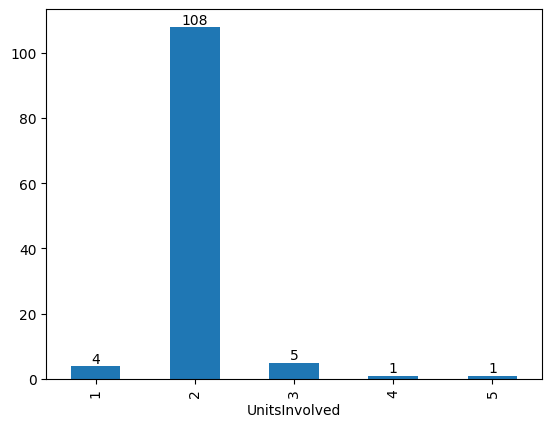

In [18]:
# Number of vehicles involves and # of motor vehicles.
ax = df['UnitsInvolved'].sort_values().value_counts(sort=False).plot(kind='bar')
ax.bar_label(ax.containers[0])
ax


<Axes: xlabel='MotorVehiclesInvolved'>

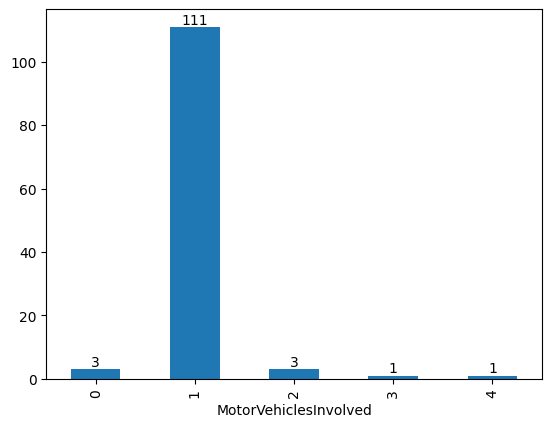

In [19]:
ax = df['MotorVehiclesInvolved'].sort_values().value_counts(sort=False).plot(kind='bar')
ax.bar_label(ax.containers[0])
ax


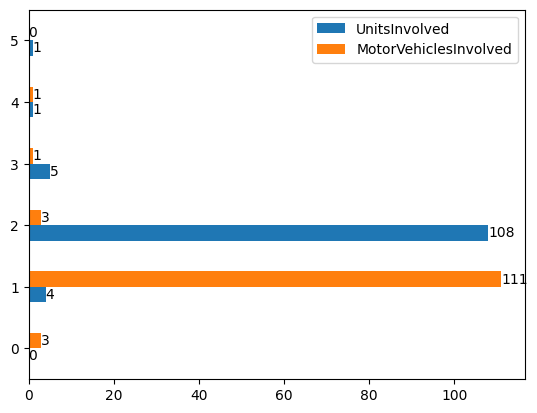

In [20]:
units = df[['UnitsInvolved', 'MotorVehiclesInvolved']]
ax = units.apply(lambda x : x.value_counts()).plot(kind='barh')
for container in ax.containers:
    ax.bar_label(container)
# Ugly graph but it gets the point across, kind of. 
# At the very least, the order of the legend should be reversed. 

Severity

In [21]:
df['SEVERITY'].value_counts(dropna=False)
# This doesn't look the way KILLED/INJURED data looks in the other dataset.
# In that case, it's a count of persons injured/killed in two columns
# To make them compatible, I will create two boolean columns for killed/injured


SEVERITY
SUSPECTED SERIOUS INJURY    93
FATALITY                    26
Name: count, dtype: int64

In [22]:
def is_fatality(string):
    return string == "FATALITY"

def is_injury(string):
    return string == "SUSPECTED SERIOUS INJURY"

severity = df['SEVERITY']
fatalities = severity.apply(is_fatality)
fatalities.name = 'fatality_indicator'
injuries = severity.apply(is_injury)
injuries.name = "injury_indicator"

severity_fix = pd.concat((severity, fatalities, injuries), axis=1)
severity_fix.value_counts()

SEVERITY                  fatality_indicator  injury_indicator
SUSPECTED SERIOUS INJURY  False               True                93
FATALITY                  True                False               26
Name: count, dtype: int64

DirAnalysisCode

In [23]:
df['DirAnalysisCode'].value_counts(dropna=False)


DirAnalysisCode
COLLISION WITH BICYCLIST NON INTERSECTION       57
COLLISION WITH BICYCLE IN INTERSECTION          45
NaN                                              9
COLLISION WITH PEDESTRIAN NON - INTERSECTION     2
COLLISION WITH PEDESTRIAN IN INTERSECTION        2
OTHER INTERSECTION COLLISIONS                    2
OTHER ROADWAY OR MID-BLOCK COLLISION             1
1 VEHICLE ENTERING/LEAVING ENTRANCE              1
Name: count, dtype: int64

MannerofCollision

In [24]:
df['MannerofCollision'].value_counts(dropna=False)


MannerofCollision
SINGLE VEHICLE    113
ANGLE               5
HEAD ON             1
Name: count, dtype: int64


##### Crash analysis codes: Road/weather/light conditions       
`['Weather', 'RdwyConditionCode', 'LightCondition']`

For this phase of discovery/cleaning, I'm not going to do anything with these but keep them. 
I'll take a look at the other data and see what the human readable strings for conditions look
like. Hopefully, they'll be easy to match up.

In [25]:
df["Weather"].value_counts(dropna=False)

Weather
CLEAR            90
CLOUDY           20
RAINING           7
FOG WITH RAIN     1
OTHER             1
Name: count, dtype: int64

In [26]:
df["RdwyConditionCode"].value_counts(dropna=False)

RdwyConditionCode
DRY    106
WET     13
Name: count, dtype: int64

In [27]:
df["LightCondition"].value_counts(dropna=False)

LightCondition
DAYLIGHT                           60
DARK-HWY NOT LIGHTED               23
DARK-HWY LIGHTED/ON                20
DUSK                                5
DARK-HWY LIGHTED/OFF                4
DAWN                                3
DARK (UNKNOWN ROADWAY LIGHTING)     3
OTHER                               1
Name: count, dtype: int64

#### Geolocation columns

In [28]:
df[['X', 'Y', 'Latitude', 'Longitude',]]
df[df['X'] != df['Longitude']]
# Returns empty dataframe. All records match
df[df['Y'] != df['Latitude']]
# Also empty
# X == Longitude and Y == Latitude
# Dropping X, Y, keeping Longitude, Latitude


,X,Y,IncidentID,AgencyName,RdwyNumber,Street,StreetDir,RoadwayName,StreetSfx,OWNER,...,RdwyConditionCode,HitandRun,DirAnalysisCode,MannerofCollision,RdwyCharacter,LightCondition,RampFromRdwyId,RampToRdwyId,IsSecondaryCollision,ObjectId


In [29]:
# Identifying number for crash case
ID = df['IncidentID']
ID.info()
len(ID.unique())
# Not all IDs are unique!



<class 'pandas.core.series.Series'>
Index: 119 entries, 49 to 4927
Series name: IncidentID
Non-Null Count  Dtype
--------------  -----
119 non-null    int64
dtypes: int64(1)
memory usage: 1.9 KB


117

<Axes: ylabel='COUNCIL_DISTRICT'>

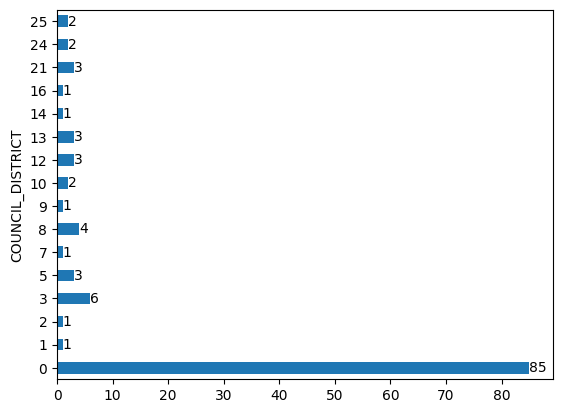

In [30]:


# Metro council district where crash occurred
CD = df['COUNCIL_DISTRICT']
CD.unique()
values = CD.value_counts().sort_index()
values = values.sort_index()
ax = values.plot(kind = 'barh')
ax.bar_label(ax.containers[0])
ax


### Address columns


#TODO
Some of the *Name information has long strings. Deal with this

In [31]:
# Main roadway information
df[['RdwyNumber', 'Street', 'StreetDir', 'RoadwayName', 'StreetSfx']]

,RdwyNumber,Street,StreetDir,RoadwayName,StreetSfx
49,NaN,NaN,NaN,BARRET,AVE
231,KY1934,NaN,NaN,GREENBELT,HWY
388,KY1851,NaN,NaN,HUTCHERSON,DR
435,NaN,NaN,W,HILL,ST
483,US0031W,16600,NaN,DIXIE,HWY
...,...,...,...,...,...
4821,KY1727,NaN,NaN,TERRY,RD
4840,NaN,4731,S,3RD,ST
4901,NaN,NaN,NaN,KRAMERS,LN
4912,KY1065,NaN,NaN,OUTER,LOOP


In [32]:

# Intersection info
df[['IntersectionRdwy', 'IntersectionRdwyName']]
# Similar to other data


,IntersectionRdwy,IntersectionRdwyName
49,NaN,WINTER
231,NaN,NaN
388,NaN,NaN
435,KY1020,3RD
483,NaN,NaN
...,...,...
4821,NaN,RIVER POINTE
4840,NaN,NaN
4901,NaN,NaN
4912,NaN,NaN


In [33]:

# Between streets info
df[['BetweenStRdwy1', 'BetweenStRdwyName1', 'BetweenStRdwy2', 'BetweenStRdwyName2']]
# Similar to other data and similar to main road report


,BetweenStRdwy1,BetweenStRdwyName1,BetweenStRdwy2,BetweenStRdwyName2
49,NaN,NaN,NaN,NaN
231,NaN,DISTRIBUTION,NaN,INTERMODAL
388,NaN,NaN,NaN,NaN
435,NaN,NaN,NaN,NaN
483,NaN,NaN,NaN,NaN
...,...,...,...,...
4821,NaN,NaN,NaN,NaN
4840,NaN,NaN,NaN,NaN
4901,NaN,NaN,NaN,NaN
4912,NaN,CAROL,NaN,NOLTEMEYER WYNDE


In [34]:
df[df['BetweenStRdwy1'].isnull() == False]['BetweenStRdwy1']

714      I 0264
1223    US0031W
2791     KY2049
4446     KY0841
Name: BetweenStRdwy1, dtype: object

In [35]:
df[['RampFromRdwyId', 'RampToRdwyId',]].info()
# This data actually has values for these fields.
# I will have to ignore them anyway since I have nothing comparable in the other data.

<class 'pandas.core.frame.DataFrame'>
Index: 119 entries, 49 to 4927
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   RampFromRdwyId  0 non-null      object
 1   RampToRdwyId    0 non-null      object
dtypes: object(2)
memory usage: 2.8+ KB


In [36]:

df['Milepoint']
# Is this useful for highway accidents?

49      1.012
231     4.965
388     0.119
435     0.186
483     1.319
        ...  
4821    1.999
4840    1.347
4901    0.507
4912    6.220
4927    3.708
Name: Milepoint, Length: 119, dtype: float64

### Time/date columns

['DAY_OF_WEEK', 'CollisionDate', 'CollisionTime', 'HOUR_OF_DAY']


In [37]:

times = df[['DAY_OF_WEEK', 'HOUR_OF_DAY', 'CollisionDate', 'CollisionTime']]
# Parse out CollisionDate 
# Check times against HOUR_OF_DAY
# Derive day of the week and check?
times.info()
##! CollisionTime has some null values!
times

<class 'pandas.core.frame.DataFrame'>
Index: 119 entries, 49 to 4927
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DAY_OF_WEEK    119 non-null    object 
 1   HOUR_OF_DAY    119 non-null    object 
 2   CollisionDate  119 non-null    object 
 3   CollisionTime  119 non-null    float64
dtypes: float64(1), object(3)
memory usage: 4.6+ KB


,DAY_OF_WEEK,HOUR_OF_DAY,CollisionDate,CollisionTime
49,WEDNESDAY,8AM,2016/02/03 13:55:00+00,855.0
231,FRIDAY,7PM,2017/02/04 00:59:00+00,1959.0
388,FRIDAY,11PM,2016/04/16 03:28:00+00,2328.0
435,SUNDAY,3PM,2016/09/11 19:25:00+00,1525.0
483,MONDAY,10PM,2016/10/04 02:04:00+00,2204.0
...,...,...,...,...
4821,SUNDAY,2AM,2022/07/17 06:28:00+00,228.0
4840,SUNDAY,9PM,2022/07/18 01:16:00+00,2116.0
4901,THURSDAY,4PM,2023/08/10 20:15:00+00,1615.0
4912,FRIDAY,11PM,2023/09/23 03:25:00+00,2325.0


Collision date time and CollisionTime don't seem to match; they should. This appears to be some error in the CSV generated by LOJIC on the Louisville Open Data portal. On the online viewer the time and date all line up. Very strange. The CollisionTime column appears to be correct. With the day of the week info I should be able to derive the correct date and time. 

In [38]:
# Bringing in pyparsing to parse CollisionDate
integer = pyp.Word(pyp.nums).set_name("integer")
# Define integer word: a string of numeric characters 0-9

date_expr = integer("year") + '/' + integer("month") + '/' + integer('day')
time_expr = (integer("hour") + ":" + integer("minute") +
              (pyp.Literal(":") + integer("second") + "+" + integer("ms")).suppress())

CollisionDate_expr = date_expr + time_expr

def get_CD_string(location):
    return times.iloc[location]['CollisionDate']


def parse_CD(string):
    out = CollisionDate_expr.parse_string(string).as_dict()
    return {K:int(V) for K, V in out.items()}

# Turn the date-time string in data into a pd.Timestamp object
def CD_to_Timestamp(string):
    return pd.Timestamp(**parse_CD(string))

In [39]:
# Testing parsing code
location = 49 # <- Change int value to test different rows
test = get_CD_string(location) 
print(test)
ts = CD_to_Timestamp(test)
print(ts)


2020/02/27 01:47:00+00
2020-02-27 01:47:00


In [40]:
# Parsing ColisionTime column
CT = df['CollisionTime']
CT.info()
CT.agg(("max", "min", "median"))

<class 'pandas.core.series.Series'>
Index: 119 entries, 49 to 4927
Series name: CollisionTime
Non-Null Count  Dtype  
--------------  -----  
119 non-null    float64
dtypes: float64(1)
memory usage: 1.9 KB


max       2356.0
min         12.0
median    1612.0
Name: CollisionTime, dtype: float64

In [41]:
def parse_CollisionTime(time):
    minutes = int(time%100)
    hours = int(time // 100)
    return {'CThour':hours, 'CTminute':minutes}

In [42]:
location = 49 # <- Change to test different values.
test = times.iloc[location]['CollisionTime']
print(test)
parse_CollisionTime(test)

2047.0


{'CThour': 20, 'CTminute': 47}

In [43]:
def adjust_timestamp(ts:pd.Timestamp, new_hour, new_minute):
    return pd.Timestamp(hour=new_hour, minute=new_minute,
                        year = ts.year, month=ts.month, day=ts.day)

print(ts)
adjust_timestamp(ts, 10, 13)
# Works. Good news. 

2020-02-27 01:47:00


Timestamp('2020-02-27 10:13:00')

In [44]:
ts - adjust_timestamp(ts, 10, 13)
# I'll get timedeltas for eachrow to see what's going on.


Timedelta('-1 days +15:34:00')

In [45]:
def get_time_adjustment(location):
    data = df.iloc[location]
    timestamp = CD_to_Timestamp(data['CollisionDate'])
    CT = parse_CollisionTime(data['CollisionTime'])
    return timestamp, adjust_timestamp(timestamp, CT['CThour'], CT['CTminute'])

# Tests
location = 17
print(df.iloc[location][["CollisionDate", "CollisionTime"]])
get_time_adjustment(location)
#df.iloc[17][["CollisionTime", "CollisionDate"]]

CollisionDate    2018/08/30 23:54:00+00
CollisionTime                    1954.0
Name: 1194, dtype: object


(Timestamp('2018-08-30 23:54:00'), Timestamp('2018-08-30 19:54:00'))

In [46]:
data = list()
for loc in range(len(df)):
    date, adjusted_date = get_time_adjustment(loc)
    data.append((date, adjusted_date, date - adjusted_date))
AT = pd.DataFrame(data, columns="CD_raw CD_adj diff".split())


In [47]:
AT.groupby("diff")["diff"].value_counts()
#AT

diff
-1 days +04:00:00    25
-1 days +05:00:00     5
0 days 04:00:00      64
0 days 05:00:00      25
Name: count, dtype: int64

The differences in time are not consistent. 
My guess is that this has to do with time zone conversions.
Times in dataset are supposed to be given in Eastern Standard Time, which is
GMT-5 in the summer and GMT-4 during daylight saving time. 


In [48]:
location = 1
ts = CD_to_Timestamp(df.iloc[location]["CollisionDate"])
hm = parse_CollisionTime(df.iloc[location]["CollisionTime"])
print(ts)
print(adjust_timestamp(ts, hm['CThour'], hm['CTminute'])) 
print(ts.tz_localize("UTC").tz_convert("US/Eastern"))

convert_timestamp_tz = lambda ts:ts.tz_localize("UTC").tz_convert("US/Eastern")

2017-02-04 00:59:00
2017-02-04 19:59:00
2017-02-03 19:59:00-05:00


In [49]:
def test_new_time_adjustment(loc):
    date = CD_to_Timestamp(times.iloc[loc]["CollisionDate"])
    adj_tz = convert_timestamp_tz(date)
    CT = parse_CollisionTime( times.iloc[loc]["CollisionTime"])
    return (adj_tz.hour == CT['CThour']) and (adj_tz.minute == CT['CTminute'])

all(test_new_time_adjustment(loc) for loc in range(len(times)))


True

Good news. This seems to work just fine. Changing the time may change the date, which may interact 
with DAY_OF_WEEK column.

In [50]:
def convert_CollisionDate(string):
    TS = CD_to_Timestamp(string)
    return convert_timestamp_tz(TS)

adj_CollisionDate = times["CollisionDate"].apply(convert_CollisionDate)
adj_DOW = adj_CollisionDate.apply(lambda x:x.day_name().upper())
adj_DOW.name = "DOW"

adj = pd.concat((times["DAY_OF_WEEK"], adj_CollisionDate, adj_DOW), axis=1)
adj[adj["DAY_OF_WEEK"] != adj["DOW"]].empty # Looking for HOUR_OF_DAY, DOW mismatches
# None found

True

Works like a charm. Time zone adjustment fixes all my date/time problems in this data.

### Other columns

In [51]:
# Object Id column
df['ObjectId'].info()
len(df['ObjectId'].unique())
# Unique identifier for row. 




<class 'pandas.core.series.Series'>
Index: 119 entries, 49 to 4927
Series name: ObjectId
Non-Null Count  Dtype
--------------  -----
119 non-null    int64
dtypes: int64(1)
memory usage: 1.9 KB


119

In [52]:
df['AgencyName'].unique()
df['AgencyName'].value_counts(dropna=False)
# No null values

AgencyName
LOUISVILLE METRO POLICE DEPT      110
SHIVELY POLICE DEPARTMENT           5
LYNDON POLICE DEPARTMENT            2
UNIV. OF LOUISVILLE POLICE          1
ST. MATTHEWS POLICE DEPARTMENT      1
Name: count, dtype: int64